In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, GlobalAveragePooling2D
)
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    r"..\dataset\FishImgDataset\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    r"..\dataset\FishImgDataset\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes

Found 3520 images belonging to 8 classes.
Found 1185 images belonging to 8 classes.


In [37]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()


c:\Users\Adhim Hendra\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,728 (84.86 MB)

 Trainable params: 22,246,728 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_cnn = cnn_model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop]
)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5057 - loss: 1.5032 - val_accuracy: 0.5030 - val_loss: 1.4388
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5474 - loss: 1.3637 - val_accuracy: 0.5578 - val_loss: 1.2913
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5793 - loss: 1.2479 - val_accuracy: 0.5916 - val_loss: 1.1799
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5872 - loss: 1.1856 - val_accuracy: 0.6160 - val_loss: 1.0874
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6239 - loss: 1.1200 - val_accuracy: 0.6042 - val_loss: 1.1293
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.6426 - loss: 1.0712 - val_accuracy: 0.6295 - val_loss: 1.0326
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6514 - loss: 1.0302 - val_accuracy: 0.6498 - val_loss: 0.9911
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6611 - loss: 0.9963 - val_accu

In [19]:
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred = model.predict(generator)
    y_pred = np.argmax(y_pred, axis=1)

    print(classification_report(
        y_true, y_pred,
        target_names=generator.class_indices.keys()
    ))
    return y_true, y_pred


In [20]:
y_true_cnn, y_pred_cnn = evaluate_model(cnn_model, val_gen)

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step
                precision    recall  f1-score   support

       Catfish       0.90      0.71      0.79        97
Glass Perchlet       0.98      0.46      0.63       124
          Goby       0.72      0.88      0.79       189
       Gourami       0.88      0.80      0.84        97
    Grass_Carp       0.89      0.92      0.91       378
     Knifefish       0.77      0.67      0.72       100
   Silver Barb       0.63      0.83      0.71       105
       Tilapia       0.67      0.77      0.72        95

      accuracy                           0.80      1185
     macro avg       0.80      0.76      0.76      1185
  weighted avg       0.82      0.80      0.80      1185



In [21]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


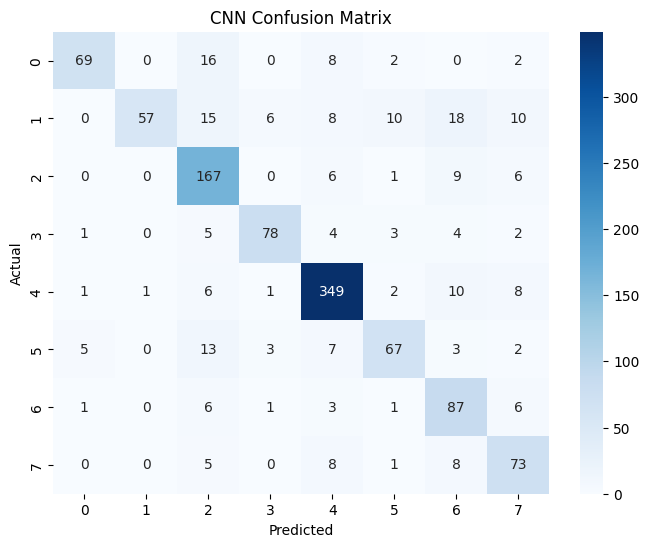

In [22]:
plot_confusion(y_true_cnn, y_pred_cnn, "CNN Confusion Matrix")

In [23]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.legend(['Train', 'Validation'])

    plt.show()


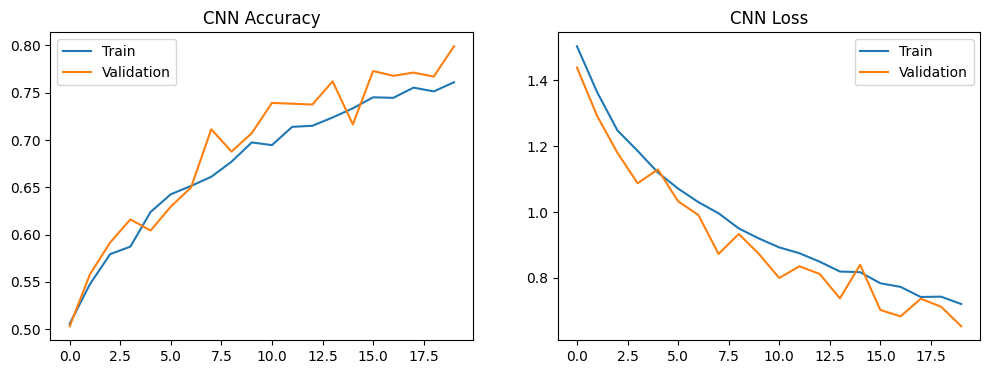

In [24]:
plot_history(history_cnn, "CNN")

In [35]:
def save_best_model(model, history, model_name):
    import os

    # keluar dari folder notebook → masuk folder model
    save_dir = os.path.join("..", "model")
    os.makedirs(save_dir, exist_ok=True)

    # ambil val_accuracy terbaik
    best_val_acc = max(history.history['val_accuracy'])

    save_path = os.path.join(
        save_dir,
        f"{model_name}_valacc_{best_val_acc:.4f}.h5"
    )

    model.save(save_path)

    print(f"Best model '{model_name}' disimpan di:")
    print(os.path.abspath(save_path))


In [36]:
save_best_model(cnn_model, history_cnn, "cnn_fish_classifier")

Best model 'cnn_fish_classifier' disimpan di:
d:\Semester 7\mesin learning\Praktikum\uap\model\cnn_fish_classifier_valacc_0.7992.h5


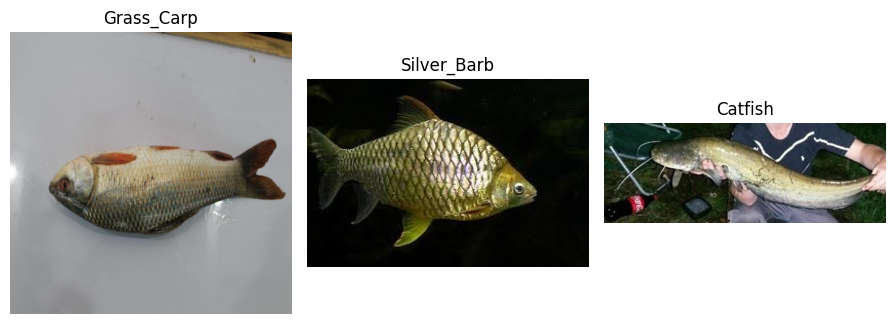

In [32]:
#GAMBAR SECARA ACAK DARI DATA TEST

import os
import random

test_dir = r"..\dataset\FishImgDataset\test"
# ambil semua path gambar di folder test
all_images = []
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            all_images.append(os.path.join(class_path, img_name))

# pilih gambar secara acak
random_samples = random.sample(all_images, 3)


import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 8))

for i, img_path in enumerate(random_samples):
    img = Image.open(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)

    # ambil nama kelas dari folder
    class_name = os.path.basename(os.path.dirname(img_path))
    plt.title(class_name)

    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


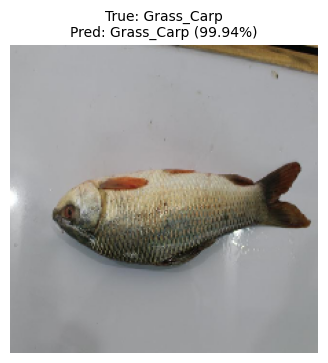

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


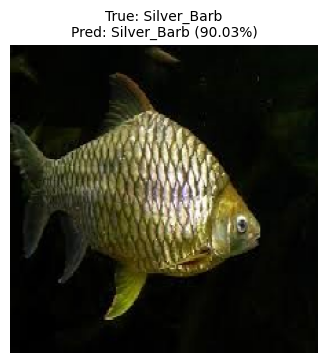

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


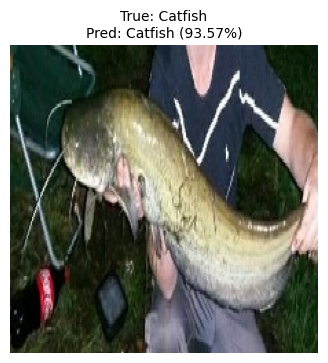

In [ ]:
#PREDIKSI GAMBAR RANDOM
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os

class_names = list(train_gen.class_indices.keys())

for img_path in random_samples:
    # ===== TRUE LABEL (dari folder) =====
    true_label = os.path.basename(os.path.dirname(img_path))

    # ===== LOAD & PREPROCESS IMAGE =====
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ===== PREDIKSI =====
    preds = cnn_model.predict(img_array)
    pred_idx = np.argmax(preds, axis=1)[0]
    pred_label = class_names[pred_idx]
    confidence = np.max(preds) * 100

    # ===== VISUALISASI =====
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(
        f"True: {true_label}\nPred: {pred_label} ({confidence:.2f}%)",
        fontsize=10
    )
    plt.axis("off")
    plt.show()
